In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Dataset: Titanic
df = pd.read_csv(r"C:\Users\janap\OneDrive\Documents\Desktop\Task1_Titanic\data\train.csv.csv")

In [4]:
# Exploring basic Info...
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
# Handle missing values for Age: median, Embarked: mode
df = df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
})

In [6]:
# Encoding
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])

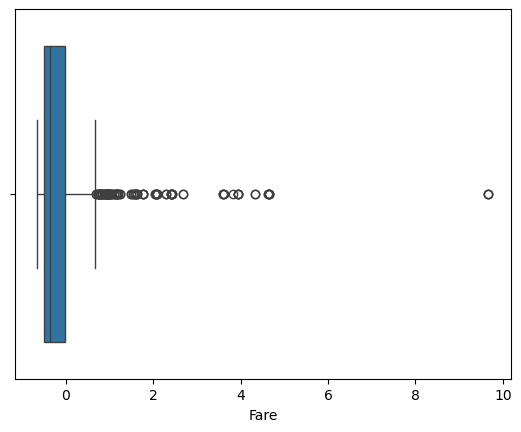

In [8]:
# Using boxplot for visualisation
sns.boxplot(x=df['Fare'])
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

In [10]:
# Saving Cleaned Data
df.to_csv(r"C:\Users\janap\OneDrive\Documents\Desktop\Task1_Titanic\data\cleaned_titanic.csv.txt", index=False)